In [1]:
import tensorflow as tf


In [17]:
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

from tensorflow.keras.layers import Dense,GlobalAveragePooling2D,Convolution2D,BatchNormalization
from tensorflow.keras.layers import Flatten,MaxPooling2D,Dropout

from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.densenet import preprocess_input

from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,img_to_array

from tensorflow.keras.models import Model

from tensorflow.keras.optimizers import Adam

from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

import warnings
warnings.filterwarnings("ignore")

In [18]:
model_d=MobileNetV2(weights='imagenet',include_top=False, input_shape=(128, 128, 3)) 

x=model_d.output

x= GlobalAveragePooling2D()(x)
x= BatchNormalization()(x)
x= Dropout(0.5)(x)#to prevent overfitting
x= Dense(1024,activation='relu')(x) 
x= Dense(512,activation='relu')(x) 
x= BatchNormalization()(x)
x= Dropout(0.5)(x)
preds=Dense(4,activation='softmax')(x) #FC-layer(weights='imagenet',include_top=False, input_shape=(128, 128, 3)) 


In [19]:
model=Model(inputs=model_d.input,outputs=preds)
model.summary()


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 64, 64, 32)   864         ['input_2[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 64, 64, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 64, 64, 32)   0           ['bn_Conv1[0][0]']         

 nv2D)                                                                                            
                                                                                                  
 block_3_depthwise_BN (BatchNor  (None, 16, 16, 144)  576        ['block_3_depthwise[0][0]']      
 malization)                                                                                      
                                                                                                  
 block_3_depthwise_relu (ReLU)  (None, 16, 16, 144)  0           ['block_3_depthwise_BN[0][0]']   
                                                                                                  
 block_3_project (Conv2D)       (None, 16, 16, 32)   4608        ['block_3_depthwise_relu[0][0]'] 
                                                                                                  
 block_3_project_BN (BatchNorma  (None, 16, 16, 32)  128         ['block_3_project[0][0]']        
 lization)

 ization)                                                                                         
                                                                                                  
 block_7_expand_relu (ReLU)     (None, 8, 8, 384)    0           ['block_7_expand_BN[0][0]']      
                                                                                                  
 block_7_depthwise (DepthwiseCo  (None, 8, 8, 384)   3456        ['block_7_expand_relu[0][0]']    
 nv2D)                                                                                            
                                                                                                  
 block_7_depthwise_BN (BatchNor  (None, 8, 8, 384)   1536        ['block_7_depthwise[0][0]']      
 malization)                                                                                      
                                                                                                  
 block_7_d

 block_10_project_BN (BatchNorm  (None, 8, 8, 96)    384         ['block_10_project[0][0]']       
 alization)                                                                                       
                                                                                                  
 block_11_expand (Conv2D)       (None, 8, 8, 576)    55296       ['block_10_project_BN[0][0]']    
                                                                                                  
 block_11_expand_BN (BatchNorma  (None, 8, 8, 576)   2304        ['block_11_expand[0][0]']        
 lization)                                                                                        
                                                                                                  
 block_11_expand_relu (ReLU)    (None, 8, 8, 576)    0           ['block_11_expand_BN[0][0]']     
                                                                                                  
 block_11_

                                                                                                  
 block_14_depthwise_relu (ReLU)  (None, 4, 4, 960)   0           ['block_14_depthwise_BN[0][0]']  
                                                                                                  
 block_14_project (Conv2D)      (None, 4, 4, 160)    153600      ['block_14_depthwise_relu[0][0]']
                                                                                                  
 block_14_project_BN (BatchNorm  (None, 4, 4, 160)   640         ['block_14_project[0][0]']       
 alization)                                                                                       
                                                                                                  
 block_14_add (Add)             (None, 4, 4, 160)    0           ['block_13_project_BN[0][0]',    
                                                                  'block_14_project_BN[0][0]']    
          

In [20]:
for layer in model.layers[:-8]:
    layer.trainable=False
    
for layer in model.layers[-8:]:
    layer.trainable=True
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 64, 64, 32)   864         ['input_2[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 64, 64, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 64, 64, 32)   0           ['bn_Conv1[0][0]']         

 nv2D)                                                                                            
                                                                                                  
 block_3_depthwise_BN (BatchNor  (None, 16, 16, 144)  576        ['block_3_depthwise[0][0]']      
 malization)                                                                                      
                                                                                                  
 block_3_depthwise_relu (ReLU)  (None, 16, 16, 144)  0           ['block_3_depthwise_BN[0][0]']   
                                                                                                  
 block_3_project (Conv2D)       (None, 16, 16, 32)   4608        ['block_3_depthwise_relu[0][0]'] 
                                                                                                  
 block_3_project_BN (BatchNorma  (None, 16, 16, 32)  128         ['block_3_project[0][0]']        
 lization)

 ization)                                                                                         
                                                                                                  
 block_7_expand_relu (ReLU)     (None, 8, 8, 384)    0           ['block_7_expand_BN[0][0]']      
                                                                                                  
 block_7_depthwise (DepthwiseCo  (None, 8, 8, 384)   3456        ['block_7_expand_relu[0][0]']    
 nv2D)                                                                                            
                                                                                                  
 block_7_depthwise_BN (BatchNor  (None, 8, 8, 384)   1536        ['block_7_depthwise[0][0]']      
 malization)                                                                                      
                                                                                                  
 block_7_d

 block_10_project_BN (BatchNorm  (None, 8, 8, 96)    384         ['block_10_project[0][0]']       
 alization)                                                                                       
                                                                                                  
 block_11_expand (Conv2D)       (None, 8, 8, 576)    55296       ['block_10_project_BN[0][0]']    
                                                                                                  
 block_11_expand_BN (BatchNorma  (None, 8, 8, 576)   2304        ['block_11_expand[0][0]']        
 lization)                                                                                        
                                                                                                  
 block_11_expand_relu (ReLU)    (None, 8, 8, 576)    0           ['block_11_expand_BN[0][0]']     
                                                                                                  
 block_11_

                                                                                                  
 block_14_depthwise_relu (ReLU)  (None, 4, 4, 960)   0           ['block_14_depthwise_BN[0][0]']  
                                                                                                  
 block_14_project (Conv2D)      (None, 4, 4, 160)    153600      ['block_14_depthwise_relu[0][0]']
                                                                                                  
 block_14_project_BN (BatchNorm  (None, 4, 4, 160)   640         ['block_14_project[0][0]']       
 alization)                                                                                       
                                                                                                  
 block_14_add (Add)             (None, 4, 4, 160)    0           ['block_13_project_BN[0][0]',    
                                                                  'block_14_project_BN[0][0]']    
          

In [21]:
import random
import os
import cv2
data = []
labels = []
#random.seed()
imagePaths = sorted(list(os.listdir("C:/Users/amalp/OneDrive/Desktop/project/main/dataset/Dataset/Train//")))
print(imagePaths)
random.shuffle(imagePaths)
os.listdir()
print(imagePaths)



for img in imagePaths:
    path=sorted(list(os.listdir("C:/Users/amalp/OneDrive/Desktop/project/main/dataset/Dataset/Train//"+img)))
    print(img)
    for i in path:
        image = cv2.imread("C:/Users/amalp/OneDrive/Desktop/project/main/dataset/Dataset/Train//"+img+'/'+i)
       
        image = cv2.resize(image, (128,128))
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = img_to_array(image)
        #print(image.shape)
        data.append(image)
        l = label = img
        labels.append(l)
print(labels)
print("it was succes")

['Alluvial soil', 'Black Soil', 'Clay soil', 'Red soil']
['Clay soil', 'Black Soil', 'Alluvial soil', 'Red soil']
Clay soil
Black Soil
Alluvial soil
Red soil
['Clay soil', 'Clay soil', 'Clay soil', 'Clay soil', 'Clay soil', 'Clay soil', 'Clay soil', 'Clay soil', 'Clay soil', 'Clay soil', 'Clay soil', 'Clay soil', 'Clay soil', 'Clay soil', 'Clay soil', 'Clay soil', 'Clay soil', 'Clay soil', 'Clay soil', 'Clay soil', 'Clay soil', 'Clay soil', 'Clay soil', 'Clay soil', 'Clay soil', 'Clay soil', 'Clay soil', 'Clay soil', 'Clay soil', 'Clay soil', 'Clay soil', 'Clay soil', 'Clay soil', 'Clay soil', 'Clay soil', 'Clay soil', 'Clay soil', 'Clay soil', 'Clay soil', 'Clay soil', 'Clay soil', 'Clay soil', 'Clay soil', 'Clay soil', 'Clay soil', 'Clay soil', 'Clay soil', 'Clay soil', 'Clay soil', 'Clay soil', 'Clay soil', 'Clay soil', 'Clay soil', 'Clay soil', 'Clay soil', 'Clay soil', 'Clay soil', 'Clay soil', 'Clay soil', 'Clay soil', 'Clay soil', 'Clay soil', 'Clay soil', 'Clay soil', 'Clay soi

In [22]:
import numpy as np
data = np.array(data, dtype="float32") / 255.0 #converts the data variable into a numpy array of type float32 and scales the pixel values to be between 0 and 1 by dividing each pixel value by 255.0.
labels = np.array(labels)#converts the labels variable into a numpy array.
mlb = LabelBinarizer()#creates an instance of the LabelBinarizer class which will be used to binarize the labels.
labels = mlb.fit_transform(labels)#each element of the vector corresponds to a class and is either 0 or 1.
print(labels[0])


[0 0 1 0]


In [23]:
(xtrain,xtest,ytrain,ytest)=train_test_split(data,labels,test_size=0.2,random_state=42)
print(xtrain.shape, xtest.shape)


(1114, 128, 128, 3) (279, 128, 128, 3)


In [27]:
anne = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=5, verbose=1, min_lr=1e-3)
checkpoint = ModelCheckpoint('model3_MobileNetV2.h5', verbose=1, save_best_only=True)

datagen = ImageDataGenerator(zoom_range = 0.2, horizontal_flip=True, shear_range=0.2)

datagen.fit(xtrain)
# Fits-the-model
history = model.fit(datagen.flow(xtrain, ytrain, batch_size=15),
               steps_per_epoch=xtrain.shape[0] //15,
               epochs=50,
               verbose=2,
               callbacks=[anne, checkpoint],
               validation_data=(xtrain, ytrain))

Epoch 1/50

Epoch 1: val_loss improved from inf to 0.17535, saving model to model3_MobileNetV2.h5
74/74 - 17s - loss: 0.2548 - accuracy: 0.9063 - val_loss: 0.1754 - val_accuracy: 0.9327 - lr: 0.0010 - 17s/epoch - 225ms/step
Epoch 2/50

Epoch 2: val_loss did not improve from 0.17535
74/74 - 18s - loss: 0.2421 - accuracy: 0.9108 - val_loss: 0.2272 - val_accuracy: 0.9192 - lr: 0.0010 - 18s/epoch - 238ms/step
Epoch 3/50

Epoch 3: val_loss did not improve from 0.17535
74/74 - 17s - loss: 0.2512 - accuracy: 0.9153 - val_loss: 0.2101 - val_accuracy: 0.9264 - lr: 0.0010 - 17s/epoch - 232ms/step
Epoch 4/50

Epoch 4: val_loss improved from 0.17535 to 0.17522, saving model to model3_MobileNetV2.h5
74/74 - 18s - loss: 0.2116 - accuracy: 0.9208 - val_loss: 0.1752 - val_accuracy: 0.9318 - lr: 0.0010 - 18s/epoch - 239ms/step
Epoch 5/50

Epoch 5: val_loss improved from 0.17522 to 0.13894, saving model to model3_MobileNetV2.h5
74/74 - 18s - loss: 0.2547 - accuracy: 0.9108 - val_loss: 0.1389 - val_accur

Epoch 43/50

Epoch 43: val_loss did not improve from 0.08881
74/74 - 17s - loss: 0.1993 - accuracy: 0.9245 - val_loss: 0.1102 - val_accuracy: 0.9614 - lr: 0.0010 - 17s/epoch - 230ms/step
Epoch 44/50

Epoch 44: val_loss did not improve from 0.08881
74/74 - 17s - loss: 0.1656 - accuracy: 0.9418 - val_loss: 0.1454 - val_accuracy: 0.9390 - lr: 0.0010 - 17s/epoch - 233ms/step
Epoch 45/50

Epoch 45: val_loss did not improve from 0.08881
74/74 - 17s - loss: 0.1777 - accuracy: 0.9399 - val_loss: 0.1415 - val_accuracy: 0.9461 - lr: 0.0010 - 17s/epoch - 229ms/step
Epoch 46/50

Epoch 46: val_loss did not improve from 0.08881
74/74 - 18s - loss: 0.1805 - accuracy: 0.9308 - val_loss: 0.1478 - val_accuracy: 0.9443 - lr: 0.0010 - 18s/epoch - 238ms/step
Epoch 47/50

Epoch 47: val_loss did not improve from 0.08881
74/74 - 17s - loss: 0.1684 - accuracy: 0.9399 - val_loss: 0.1191 - val_accuracy: 0.9560 - lr: 0.0010 - 17s/epoch - 231ms/step
Epoch 48/50

Epoch 48: val_loss did not improve from 0.08881
74/7

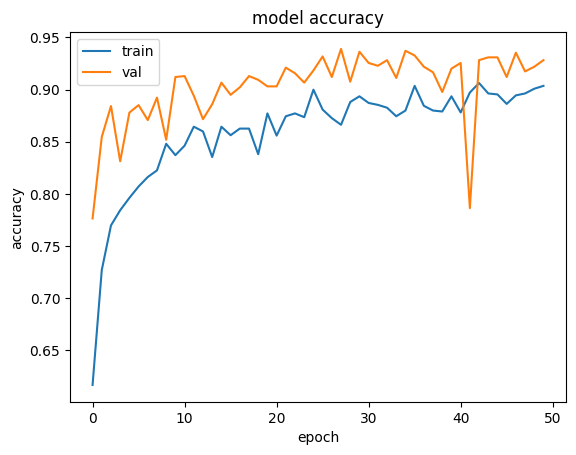

In [25]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

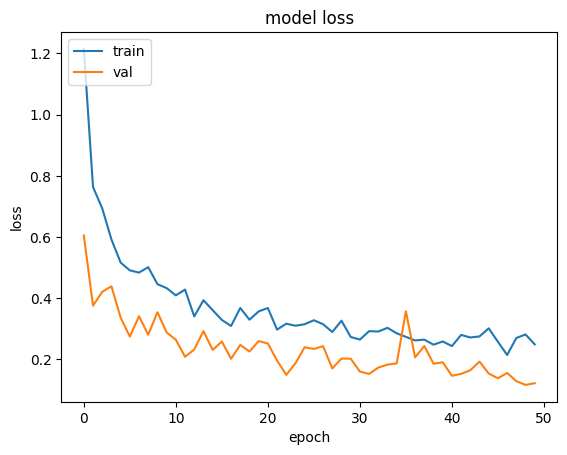

In [12]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [28]:
ypred = model.predict(xtest)
total = 0
accurate = 0
accurateindex = []
wrongindex = []
acc = []
for i in range(len(ypred)):
    if np.argmax(ypred[i]) == np.argmax(ytest[i]):
        accurate += 1
        accurateindex.append(i)
    else:
        wrongindex.append(i)
    total += 1
    acc.append(accurate/total*100)
print('Total-test-data;', total, '\taccurately-predicted-data:', accurate, '\t wrongly-predicted-data: ', total - accurate)
print('Accuracy:', round(accurate/total*100, 3), '%')

9/9 [==============================] - 2s 203ms/step
Total-test-data; 279 	accurately-predicted-data: 256 	 wrongly-predicted-data:  23
Accuracy: 91.756 %


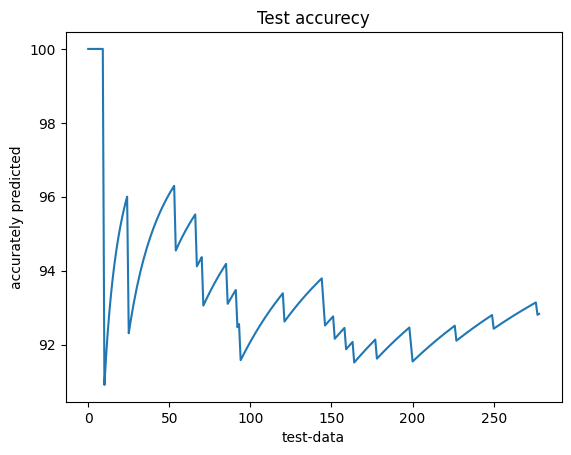

In [16]:
plt.plot(acc)
plt.plot(100)
plt.title('Test accurecy')
plt.ylabel('accurately predicted')
plt.xlabel('test-data')
#plt.legend(['train', 'val'], loc='upper left')
plt.show()


In [13]:
import seaborn as sns
Ypred = model.predict(xtest)

Ypred = np.argmax(Ypred, axis=1)
Ytrue = np.argmax(ytest, axis=1)

# cm = confusion_matrix(Ytrue, Ypred)
# plt.figure(figsize=(8, 8))
# ax = sns.heatmap(cm, cmap="rocket_r", fmt=".01f",annot_kws={'size':16}, annot=True, square=True, xticklabels=label, yticklabels=label)
# ax.set_ylabel('Actual', fontsize=16)
# ax.set_xlabel('Predicted', fontsize=16)
# plt.show()



9/9 [==============================] - 2s 208ms/step


In [14]:
from sklearn.metrics import precision_score, recall_score

# y_true are the true labels, y_pred are the predicted labels
precision = precision_score(Ytrue, Ypred, average='weighted')
recall = recall_score(Ytrue, Ypred, average='weighted')
# print(precision)
# print(recall)
F1 = 2 * (precision * recall) / (precision + recall)
print(F1)

0.9310021185066198


In [21]:
# from sklearn.metrics import f1_score
# f_scores = f1_score(Ytrue, Ypred, average="weighted")
# print(f_scores)

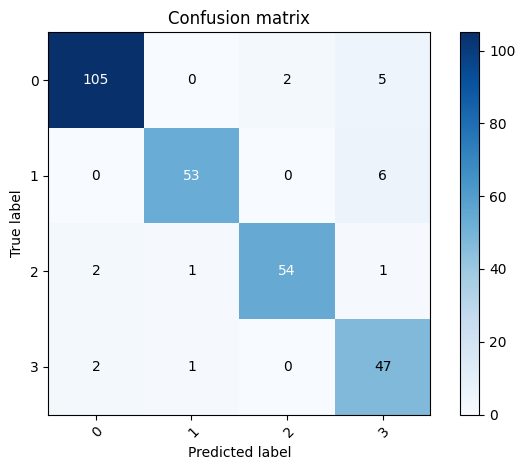

In [15]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

# y_true are the true labels, y_pred are the predicted labels
cm = confusion_matrix(Ytrue, Ypred)
classes = np.unique(Ytrue)

# Plot the confusion matrix
fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=classes, yticklabels=classes,
       title='Confusion matrix',
       ylabel='True label',
       xlabel='Predicted label')

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
fmt = 'd'
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], fmt),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black")

fig.tight_layout()
plt.show()


In [85]:
import cv2
import numpy as np
import time
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,img_to_array
import numpy as np
from tensorflow.keras.models import Model
from keras.models import load_model
model = load_model('model2_MobileNetV2.h5')
label=['Alluvial', 'black', 'Clay', 'Red']
# reading the input using the camera

pred_1 = []
image_1=cv2.imread("rd1.jpg")
image_1 = cv2.resize(image_1, (128, 128))
image_1 = img_to_array(image_1)
pred_1.append(image_1)
pred_1 = np.array(pred_1, dtype="float32") / 255.0
image_1 = cv2.cvtColor(image_1, cv2.COLOR_BGR2RGB)
#cv2.imshow("prediction", image_1)
result_2=model.predict(pred_1)
si_la = label[np.argmax(result_2)]
#print(result_2)
#print(si_la)
if si_la== "black":
   print("soil type : BLACK_ soil  :: crops :sugarcane,wheat,jawar,rice,citrus fruits,sunflower ")
elif si_la== "Alluvial":
   print("soil type : Alluvial_ soil :: crops :tobacco,rice,wheat,bajra,chickpea.soybean,cotton,mustard,groundnut,sesame,barley,maize,oliseeds")
elif si_la== "Clay":
   print("soil type :Clay_ soil :: crops :Bean Varieties,Carrots ,Swiss Chard,rice")
else:
  print("soil type :Red soil :: crops : maize,rice,groundnut,potato,pulses " )

1/1 [==============================] - 2s 2s/step
soil type :Red soil :: crops : maize,rice,groundnut,potato,pulses 
